## Get the size of individual partitions in S3 and plot them

This notebook requests the size of individual folders in s3, partitioned by day, via a call to the aws-cli. The size of the partition is extracted from the response and added to a dictionary using the partition date as the key. 


**Don't forget to login to the correct AWS account via scloud first**


In [1]:
# Generate a set of date partitions. 
# Iterate over these, making an aws-cli request on a partition-by-partition basis.

from pandas import date_range
import os
partitions = date_range(start='2014-01', end="2019-01")
partitions = [day.strftime("%Y-%m-%d") for day in partitions]

In [2]:
# The base command. You can extract the path template if you want
aws_ls = "aws s3 ls --summarize --recursive s3://my_bucket/partition={}"


In [3]:
# Response contains this 'Total Size: 6766004'. 
# I used two pipes to extract this, as I couldn't 
# get the grouping to work in MacOs.

pipe_grep_size = "| egrep -o 'Size\: ([0-9]+)'"
pipe_grep_mib = "| egrep  -o '[0-9]+'"

In [7]:
def compose_command(partition,
                   pipe_1,
                   pipe_2):
 
    cmd = "{}{}{}".format(ls_aws_partition,
                          pipe_grep_size,
                          pipe_grep_mib
                             ) 
    return cmd

In [ ]:
# Iterates over the partitions, requesting a summary of each via aws-cli.
# Size of partition in MiB is extracted and added to a dictionary, using 
# the partition date as key.
#
# Prints out every 100th partition, just so you know where you are.

partition_sizes = {}
for idx, p in enumerate(partitions):
    ls_aws_partition = aws_ls.format(p)
    command = compose_command(ls_aws_partition,
                              pipe_grep_size,
                              pipe_grep_mib)
    
    executed_cmd = os.popen(command).read()
    if (idx % 100 == 0):
        print(p) 
    partition_sizes[p] = float(executed_cmd)
   

### Plot the results.

In [1]:
import pickle
with open('partition_sizes.pickle', 'rb') as handle:
    partition_sizes = pickle.load(handle)


In [2]:
import matplotlib.pylab as plt

# sort by key
lists = sorted(partition_sizes.items()) 

# unpack a list of pairs 
x, y = zip(*lists[:-1]) 



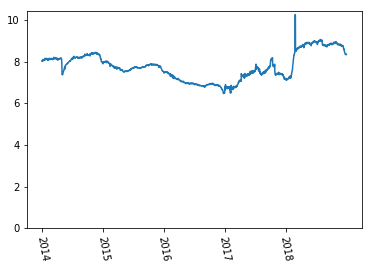

In [3]:
plt.figure()
ax1 = plt.axes()
ax1.plot(x, y)
ax1.set_xticks([x[0], x[365], x[365*2], x[365*3+1], x[365*3+366]])
ax1.set_xticklabels(["2014", "2015", "2016", "2017", "2018"])
ax1.set_yticklabels([0, 2, 4, 6, 8, 10])
ax1.set_ylim(bottom=0)
plt.xticks(rotation=280)
plt.show()